In [13]:
# Import packages
import pandas as pd
import matplotlib as plt
from matplotlib import figure, pyplot
from statistics import median, mean
import numpy as np
import scipy.stats as st
from numpy import nan
import math
import seaborn as sns
from kneed import KneeLocator

In [14]:
# Load in features
features = pd.read_csv(r"/Users/ilanadeutsch/Desktop/features.csv").iloc[:,1:]
erodedFeatures = pd.read_csv(r"/Users/ilanadeutsch/Desktop/featuresEroded.csv").iloc[:,1:]

# Intialize variables
results = []

# Loop through all features
for count, feature in enumerate(features):
    
    # Calculate ratio 1
    ratio1 = features[str(feature)]/erodedFeatures[str(feature)]
    ratio1 = [x for x in ratio1 if not(math.isnan(x))]

    # Return NaN for features where all ratios are undefined
    if len(ratio1) == 0:
        results.append([feature, np.nan, np.nan])
        continue 

    # Calculate MFR1
    MFR1 = mean(ratio1)

    # Calculate ratio 2
    ratio2 = erodedFeatures[str(feature)]/features[str(feature)]
    ratio2 = [x for x in ratio2 if not(math.isnan(x))]

    # Return NaN for features where all ratios are undefined
    if len(ratio2) == 0:
        results.append([feature, np.nan, np.nan])
        continue 

    # Calculate MFR 2
    MFR2 = mean(ratio2)

    # Calculate CMFR
    CMFR = min(abs(1-MFR1),abs(1-MFR2))

    # Calculate CSDFR
    CSDFR1 = math.sqrt(sum(([(x - MFR1)**2 for x in ratio1]))/len(ratio1))
    CSDFR2 = math.sqrt(sum(([(x - MFR2)**2 for x in ratio2]))/len(ratio2))
    CSDFR = min(CSDFR1,CSDFR2)

    # Append results to list
    results.append([feature, CMFR, CSDFR])

# Save results as df
df = pd.DataFrame(results)

In [15]:
# NOTE: Make sure to reset cells before this before rerunning

# Set value cutoffs (For MRF: 1 = upper, 2 = lower. Both equal distance from 1)
CMRF_cutoff = 100
CSDRF_cutoff = 100

# Intialize list of dropped features
dropped_CMRF_features = []
dropped_CSDRF_features =[]

# Add features below cutoff values to a list
for featNum, feature in enumerate(df[0]):
    if abs(df.iloc[featNum,1]) > CMRF_cutoff:
        dropped_CMRF_features.append(feature) 
    elif df.iloc[featNum,2] > CSDRF_cutoff:
        dropped_CSDRF_features.append(feature)

# Remove features below specified cutoff values
df = df[abs(df[1]) < CMRF_cutoff]
df = df[abs(df[2]) < CSDRF_cutoff]

# Calculate overlap
overlap = [feature for feature in dropped_CMRF_features if feature in dropped_CSDRF_features]

# Display dropped features
print(f"Dropped MRF features: {dropped_CMRF_features}")
print(f"Total = {len(dropped_CMRF_features)}")
print("\n")
print(f"Dropped SDRF features: {dropped_CSDRF_features}")
print(f"Total = {len(dropped_CSDRF_features)}")
print("\n")
print(f"Overlap: {overlap}")
print(f"Total = {len(overlap)}")

Dropped MRF features: ['original_firstorder_10Percentile', 'LBP_radius=1.0_glszm_SmallAreaEmphasis', 'LBP_radius=1.0_glszm_SmallAreaHighGrayLevelEmphasis', 'LBP_radius=1.0_glszm_SmallAreaLowGrayLevelEmphasis']
Total = 4


Dropped SDRF features: ['bior1.1-HL_FDTA_HurstCoeff_3']
Total = 1


Overlap: []
Total = 0


Knee location: feature 918
CMFR value: 0.5841402910377358
2nd CMFR value: -0.4158597089622642


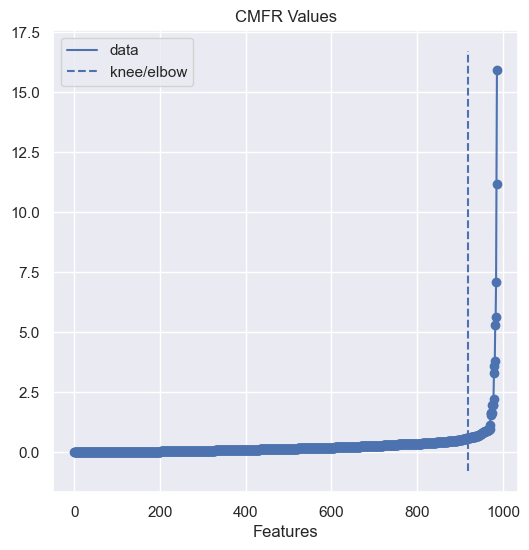

In [16]:
# Sort data frame by CMFR values and export
sorteddf=df.sort_values(by = 1)
#sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/sorted_CMFR_vals.xlsx", header = ["Feature","CMFR","CSDFR"])

# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[2]):
    sorteddf.iloc[entryNum,0] = entryNum

# Locate knee / elbow point
kneedle = KneeLocator(sorteddf.iloc[:,0].tolist(),sorteddf.iloc[:,1].tolist(), S= 200, curve="convex", direction="increasing") #,interp_method='polynomial', polynomial_degree=20)
kneedle.plot_knee()

# Print knee location
print(f"Knee location: feature {kneedle.knee}")
print(f"CMFR value: {sorteddf.iloc[kneedle.knee,1]}")
print(f"2nd CMFR value: {sorteddf.iloc[kneedle.knee,1]-1}")

# Plot nRoA values of each feature from smallest to largest
sns.set_theme()
plt.pyplot.scatter(x= sorteddf.iloc[:,0],y = sorteddf.iloc[:,1])
plt.pyplot.title("CMFR Values")
plt.pyplot.xlabel("Features")
plt.pyplot.ylabel("")
plt.pyplot.show()

Knee location: feature 955
CSDFR value: 3.710537322072767


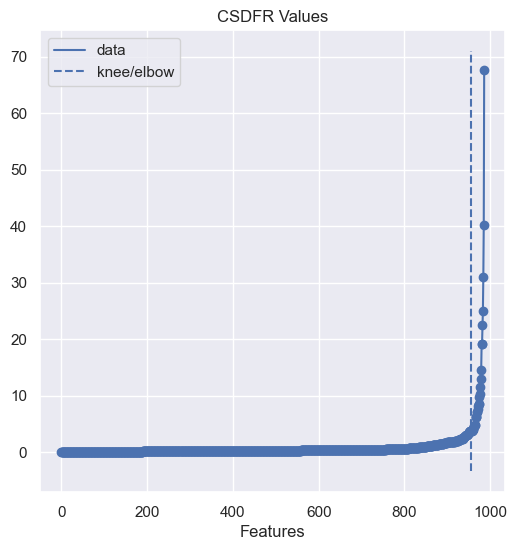

In [17]:
# Sort data frame by CSDFR values and export
sorteddf=df.sort_values(by = 2)
#sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/sorted_SDFR_vals.xlsx", header = ["Feature","CMFR","CSDFR"])

# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[2]):
    sorteddf.iloc[entryNum,0] = entryNum

# Locate knee / elbow point
kneedle = KneeLocator(sorteddf.iloc[:,0].tolist(),sorteddf.iloc[:,2].tolist(), S= 2.7, curve="convex", direction="increasing")
kneedle.plot_knee()

# Print knee location
print(f"Knee location: feature {kneedle.knee}")
print(f"CSDFR value: {sorteddf.iloc[kneedle.knee,2]}")

# Plot nRoA values of each feature from smallest to largest
sns.set_theme()
plt.pyplot.scatter(x= sorteddf.iloc[:,0],y = sorteddf.iloc[:,2])
plt.pyplot.title("CSDFR Values")
plt.pyplot.xlabel("Features")
plt.pyplot.ylabel("")
plt.pyplot.show()